# **📜 DMA Final Project Notebook**

**Group # & Name:** Group 5 - Red Wine Pirates <br/>
**Course:** Data Mining and Application <br/>
**Program & Section:** BS in Data Science - DS3A

## **📩 Introduction**

**Context**

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

We will train 6 classification models and evaluate them by implementing hold-out set method and k-fold cross validation. We will also explore the dataset by applying data preprocessing techniques to optimize the training models.

**Data**

Input variables (based on physicochemical tests): <br>
1 - fixed acidity <br>
2 - volatile acidity <br>
3 - citric acid <br>
4 - residual sugar <br>
5 - chlorides <br>
6 - free sulfur dioxide <br>
7 - total sulfur dioxide <br>
8 - density <br>
9 - pH <br>
10 - sulphates <br>
11 - alcohol <br>
 <br>
Output variable (based on sensory data): <br>
12 - quality (score between 0 and 10) <br>

**Citation** 

UCI Machine Learning. (2017). Red Wine Quality. (<a href="https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009">Kaggle.com</a>) <br>

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. <br>
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## **🔃 Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ensemble

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts, cross_val_score as cvs
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv('wine quality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## **🔎 Examine Dataset (EDA)**

### Descriptive Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'].nunique()

6

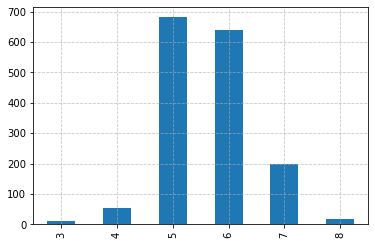

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [7]:
df['quality'].value_counts().sort_index().plot(kind = 'bar')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(df['quality'].value_counts())

### Data Preprocessing

Set an arbitrary cutoff for the dependent variable (quality) at 6.5 or higher getting classified as `good or 1`, and the remainder as `bad or 0`.

In [8]:
eda_df = df
eda_df['quality'] = eda_df['quality'].apply(lambda x: 1 if x >= 6.5 else 0)
eda_df.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1


**Count Plot**

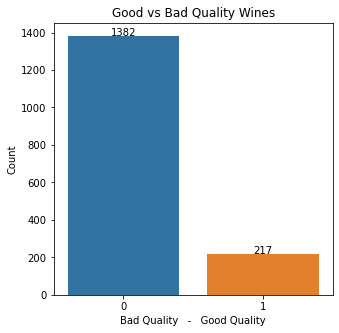

In [9]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = 'quality', data = eda_df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha='center')
plt.xlabel('Bad Quality   -   Good Quality')
plt.ylabel('Count')
plt.title('Good vs Bad Quality Wines')
plt.show()

Here, the imbalance is prominent as there is a difference of **1,165** between bad and good quality wines with bad wines being the majority.

**Correlation**

Correlation or dependence is any statistical relationship, whether causal or not, between two random variables or bivariate data.

<AxesSubplot:>

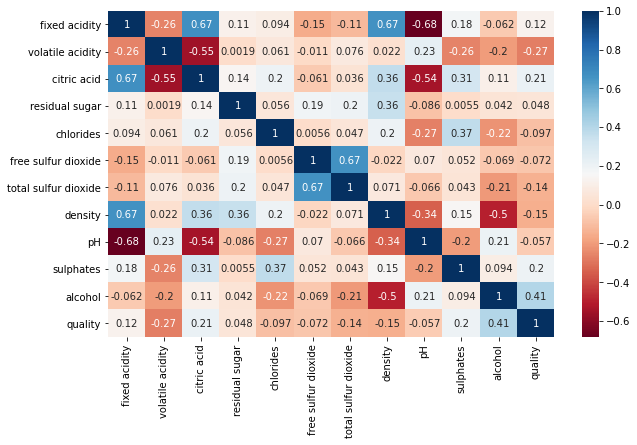

In [10]:
plt.figure(figsize = (10, 6))
sns.heatmap(eda_df.corr(), annot = True, cmap = 'RdBu')

`df.corr()` computes pairwise correlation of columns, excluding NA/null values.

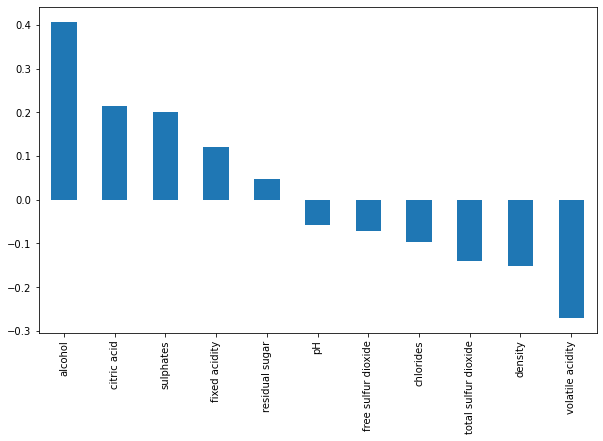

In [11]:
plt.figure(figsize = (10, 6))
corr = eda_df.corr()['quality'].sort_values(ascending=False)
corr.drop('quality').plot(kind = 'bar')
plt.show()

The plot shows the correlation of each features to the target variable `quality`. Arranged from the most correlated to least correlated.

## **🧹 Prepare Dataset**
- Identify the `predictor` and the `target` variables.
- Split the dataset for `train` and test `sets`.

### Identifying Variables

Independent variables will be `X`, and dependent variables will be `y`

In [12]:
X = eda_df.drop('quality', axis = 1)
y = eda_df['quality']

### Scaling

Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature dominates the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

`StandardScaler` standardize features by removing the mean and scaling to unit variance.

In [13]:
sc = StandardScaler()
X = sc.fit_transform(X)

### Splitting

`train_test_split` split arrays or matrices into random train and test subsets.

In [14]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.3, random_state = 42)

#### Feature Importance Plotting

Feature importance scores are used to determine the relative importance of each feature in a dataset when building a predictive model.

In [15]:
feature_names = np.array(df.drop('quality', axis = 1).columns)

In [16]:
def plot_feature_importance(name, coefficients):
    feature_importance_base = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
    feature_importance_base['Absolute_Coefficient'] = feature_importance_base['Coefficient'].abs()
    feature_importance_base = feature_importance_base.sort_values(by = 'Absolute_Coefficient')
    
    plt.figure(figsize = (10, 6))
    plt.barh(feature_importance_base['Feature'], feature_importance_base['Absolute_Coefficient'], 
            color = plt.cm.get_cmap('tab10_r')(range(len(feature_importance_base))))
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'{name} Feature Importance')
    plt.show()
    return feature_importance_base

## **🤖 Train Model**


#### Decision Tree Classifier

In [17]:
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [18]:
dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [19]:
dt_pred = dt.predict(X_test)

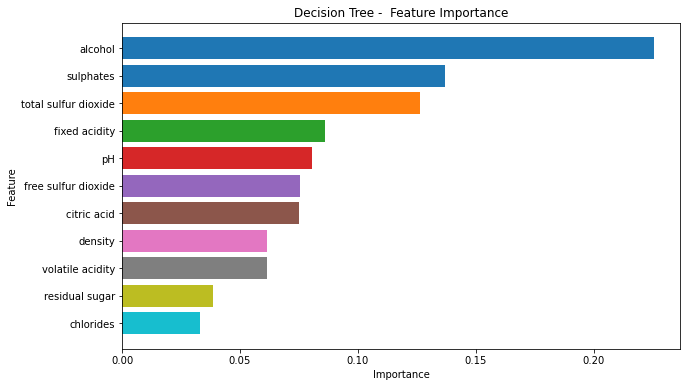

In [20]:
feature_importance_dt = plot_feature_importance('Decision Tree - ', dt.feature_importances_)

#### K Nearest Neighbor Classifier

In [21]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn

KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

1.0

In [23]:
knn_pred = knn.predict(X_test)

#### Logistic Regression

In [24]:
cw = {0: 1, 1: 10}

lr = LogisticRegression(class_weight = cw)
lr

LogisticRegression(class_weight={0: 1, 1: 10})

In [25]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.741733690795353

In [26]:
lr_pred = lr.predict(X_test)

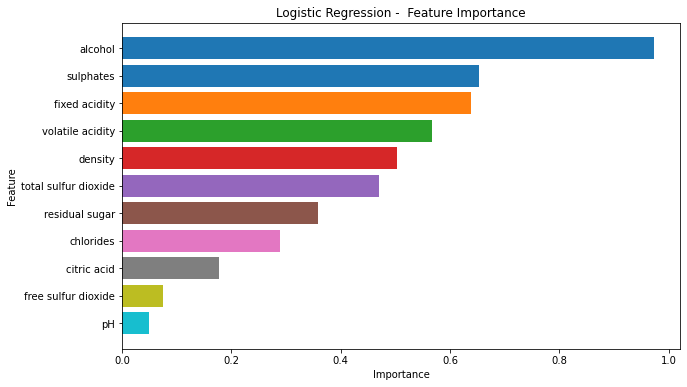

In [27]:
coefficients_lr = lr.coef_[0]
feature_importance_lr = plot_feature_importance('Logistic Regression - ', coefficients_lr)

#### Ensemble Methods

**Random Forest Classifier**

In [28]:
rf = ensemble.RandomForestClassifier()
rf

RandomForestClassifier()

In [29]:
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

1.0

In [30]:
rf_pred = rf.predict(X_test)

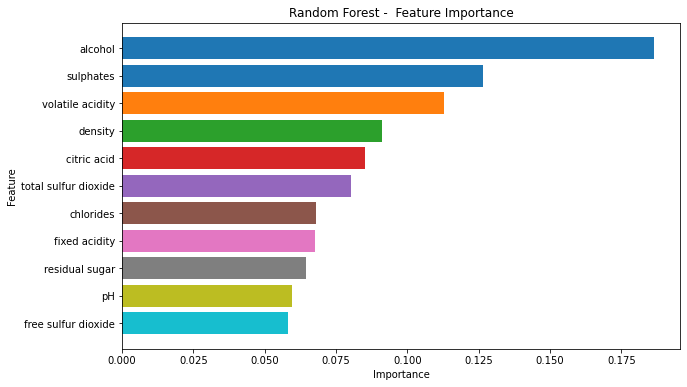

In [31]:
feature_importance_rf = plot_feature_importance('Random Forest - ', rf.feature_importances_)

**Extra Trees Classifier**

In [32]:
et = ensemble.ExtraTreesClassifier()
et

ExtraTreesClassifier()

In [33]:
et.fit(X_train, y_train)
et.score(X_train, y_train)

1.0

In [34]:
et_pred = et.predict(X_test)

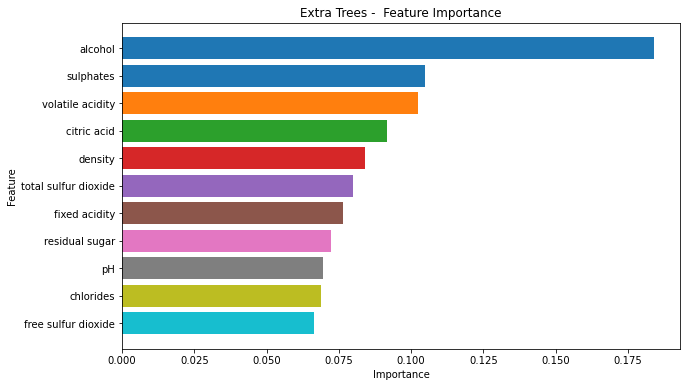

In [35]:
feature_importance_et = plot_feature_importance('Extra Trees - ', et.feature_importances_)

**Gradient Boosting Classifier**

In [36]:
gb = ensemble.GradientBoostingClassifier()
gb

GradientBoostingClassifier()

In [37]:
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.9642537980339589

In [38]:
gb_pred = gb.predict(X_test)

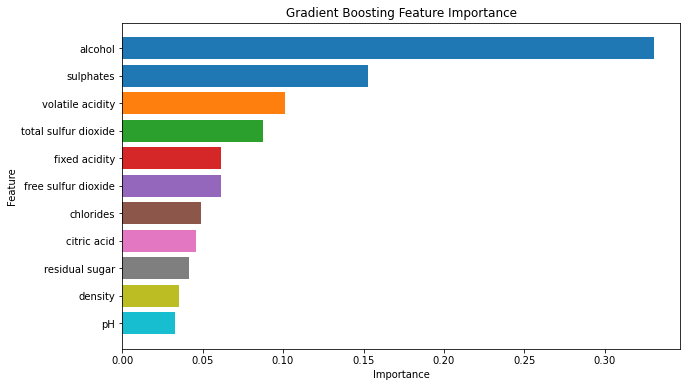

In [39]:
feature_importance_gb = plot_feature_importance('Gradient Boosting', gb.feature_importances_)

## **📝 Evaluate Model Performance**


### Classification Metrics

We will use ROC-AUC to evaluate the model performance.

ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) is a binary classification model evaluation measure. It assesses a model's ability to discriminate between positive and negative classes across all classification thresholds.

ROC-AUC is robust to imbalanced datasets, unlike accuracy which can be misleading when the class distribution is skewed. Hence, ROC-AUC is more appropriate than accuracy when the dataset is imbalanced.

In [40]:
print("Decision Tree Classifier:")
print("ROC-AUC score:", roc_auc_score(y_test, dt_pred))
print("Accuracy score:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report_imbalanced(y_test, dt_pred))

print("K Nearest Neighbors Classifier:")
print("ROC-AUC score:", roc_auc_score(y_test, knn_pred))
print("Accuracy score:", accuracy_score(y_test, knn_pred))
print("Classification Report:\n", classification_report_imbalanced(y_test, knn_pred))

print("\nLogistic Regression Classifier:")
print("ROC-AUC score:", roc_auc_score(y_test, lr_pred))
print("Accuracy score:", accuracy_score(y_test, lr_pred))
print("Classification Report:\n", classification_report_imbalanced(y_test, lr_pred))

print("\nRandom Forest Classifier:")
print("ROC-AUC score:", roc_auc_score(y_test, rf_pred))
print("Accuracy score:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report_imbalanced(y_test, rf_pred))

print("\nExtra Trees Classifier:")
print("ROC-AUC score:", roc_auc_score(y_test, et_pred))
print("Accuracy score:", accuracy_score(y_test, et_pred))
print("Classification Report:\n", classification_report_imbalanced(y_test, et_pred))

print("\nGradient Boosting Classifier:")
print("ROC-AUC score:", roc_auc_score(y_test, gb_pred))
print("Accuracy score:", accuracy_score(y_test, gb_pred))
print("Classification Report:\n", classification_report_imbalanced(y_test, gb_pred))

Decision Tree Classifier:
ROC-AUC score: 0.773680026020021
Accuracy score: 0.86875
Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.91      0.64      0.92      0.76      0.60       413
          1       0.52      0.64      0.91      0.58      0.76      0.57        67

avg / total       0.88      0.87      0.68      0.87      0.76      0.59       480

K Nearest Neighbors Classifier:
ROC-AUC score: 0.8132160023128907
Accuracy score: 0.89375
Classification Report:
                    pre       rec       spe        f1       geo       iba       sup

          0       0.95      0.92      0.70      0.94      0.81      0.66       413
          1       0.60      0.70      0.92      0.65      0.81      0.63        67

avg / total       0.90      0.89      0.73      0.90      0.81      0.66       480


Logistic Regression Classifier:
ROC-AUC score: 0.8311228361822848
Accuracy score: 0.7416666666666667
Classif

**Model Comparison**

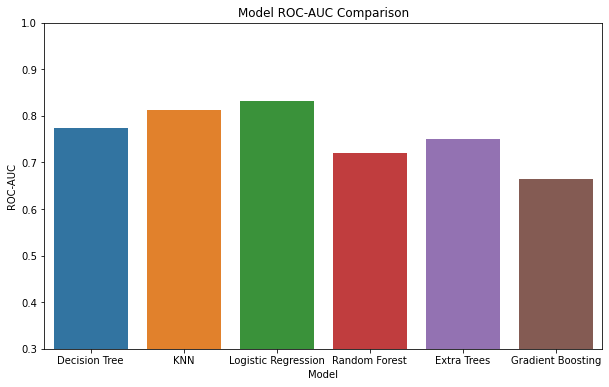

In [41]:
models = ['Decision Tree', 'KNN', 'Logistic Regression', 'Random Forest', 'Extra Trees', 'Gradient Boosting']
roc_auc = [roc_auc_score(y_test, dt_pred), roc_auc_score(y_test, knn_pred), roc_auc_score(y_test, lr_pred), 
           roc_auc_score(y_test, rf_pred), roc_auc_score(y_test, et_pred), roc_auc_score(y_test, gb_pred)]

plt.figure(figsize = (10, 6))
sns.barplot(x = models, y = roc_auc)
plt.title('Model ROC-AUC Comparison')
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.ylim(0.3, 1.0)
plt.show()

**`Logistic Regression`** outperforms the rest with a `ROC-AUC` score of **83%**. While **`Gradient Boosting`** got the lowest score.

###  K-fold cross-validation

In [42]:
kfold = 7

dt_score = cvs(dt, X, y, cv = kfold, scoring = 'roc_auc')
knn_score = cvs(knn, X, y, cv = kfold, scoring = 'roc_auc')
lr_score = cvs(lr, X, y, cv = kfold, scoring = 'roc_auc')
rf_score = cvs(rf, X, y, cv = kfold, scoring = 'roc_auc')
et_score = cvs(et, X, y, cv = kfold, scoring = 'roc_auc')
gb_score = cvs(gb, X, y, cv = kfold, scoring = 'roc_auc')

In [43]:
print("Decision Tree Classifier:")
print("ROC-AUC for each fold:\n", dt_score)
print("Mean roc-auc:", dt_score.mean())
print("Standard deviation:", dt_score.std())

print("\nK Nearest Neighbors Classifier:")
print("ROC-AUC for each fold:\n", knn_score)
print("Mean roc-auc:", knn_score.mean())
print("Standard deviation:", knn_score.std())

print("\nLogistic Regression Classifier:")
print("ROC-AUC for each fold:\n", lr_score)
print("Mean roc-auc:", lr_score.mean())
print("Standard deviation:", lr_score.std())

print("\nRandom Forest Classifier:")
print("ROC-AUC for each fold:\n", rf_score)
print("Mean roc-auc:", rf_score.mean())
print("Standard deviation:", rf_score.std())

print("\nExtra Trees Classifier:")
print("ROC-AUC for each fold:\n", et_score)
print("Mean roc-auc:", et_score.mean())
print("Standard deviation:", et_score.std())

print("\nGradient Boosting Classifier:")
print("ROC-AUC for each fold:\n", gb_score)
print("Mean roc-auc:", gb_score.mean())
print("Standard deviation:", gb_score.std())

Decision Tree Classifier:
ROC-AUC for each fold:
 [0.59775171 0.68540241 0.6611274  0.76584248 0.5189946  0.77435729
 0.70984117]
Mean roc-auc: 0.6733310082745158
Standard deviation: 0.08445140517324776

K Nearest Neighbors Classifier:
ROC-AUC for each fold:
 [0.59522646 0.62341153 0.62984686 0.78197151 0.71508105 0.73030948
 0.70894056]
Mean roc-auc: 0.6835410645792176
Standard deviation: 0.0630349568121342

Logistic Regression Classifier:
ROC-AUC for each fold:
 [0.89931574 0.87292278 0.86249593 0.93908629 0.80727035 0.870804
 0.84132962]
Mean roc-auc: 0.8704606711811558
Standard deviation: 0.038643689799665634

Random Forest Classifier:
ROC-AUC for each fold:
 [0.88913327 0.88530466 0.84506354 0.89086294 0.80849844 0.90903881
 0.82921238]
Mean roc-auc: 0.8653020060012038
Standard deviation: 0.03479122618751499

Extra Trees Classifier:
ROC-AUC for each fold:
 [0.89695341 0.90803193 0.85418703 0.88930735 0.79670869 0.90699198
 0.84714262]
Mean roc-auc: 0.8713318593783634
Standard devi

**Model Comparison**

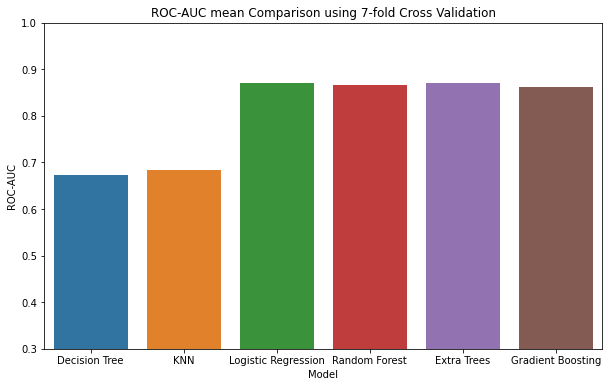

In [44]:
mean_roc_auc = [dt_score.mean(), knn_score.mean(), lr_score.mean(), rf_score.mean(), et_score.mean(), gb_score.mean()]

plt.figure(figsize = (10, 6))
sns.barplot(x = models, y = mean_roc_auc)
plt.title('ROC-AUC mean Comparison using 7-fold Cross Validation')
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.ylim(0.3, 1.0)
plt.show()

The score was based on the mean of 7 fold cross validation. **`Extra Trees`** emerged on top with a `ROC-AUC` mean of **88%**. **`Random Forest`** and **`Gradient Boosting`** also performed better than their previous models in hold-out method, whilst **`Decision Tree`** and **`KNN`** dropped scores compared to their previous models in hold-out method.

## **📈 Resampling**

### ADASYN

Oversample using `Adaptive Synthetic (ADASYN)` algorithm.

This method is similar to SMOTE but it generates different number of samples depending on an estimate of the local distribution of the class to be oversampled.

**Data Preprocessing**

In [45]:
eda_df1 = eda_df
eda_df1['quality'].replace([0, 1], ['Bad', 'Good'], inplace = True)
eda_df1.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Good


**Identifying Variables**

In [46]:
X1 = eda_df1.drop('quality', axis = 1)
y1 = eda_df1['quality']

**Scaling**

In [47]:
sc = StandardScaler()
X1 = sc.fit_transform(X1)

**Oversampling**

In [48]:
adasyn = ADASYN(n_neighbors = 5, random_state = 42)
X_adasyn, y_adasyn = adasyn.fit_resample(X1, y1)

**Plotting Values Count**

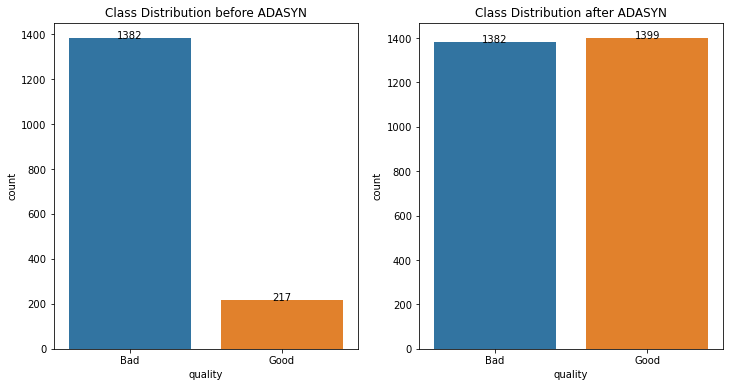

In [49]:
plt.figure(figsize = (12, 6))
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x = y1, ax = ax1)
plt.title('Class Distribution before ADASYN')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'baseline')

ax2 = plt.subplot(1, 2, 2)
sns.countplot(x = y_adasyn, ax = ax2)
plt.title('Class Distribution after ADASYN')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'baseline')

plt.show()

In the oversampling method, `ADASYN` algorithm generated **1182** synthetic data. 

**Splitting**

In [50]:
X_train1, X_test1, y_train1, y_test1 = tts(X_adasyn, y_adasyn, test_size = 0.3, random_state = 1)

**Model Training and Testing**

In [51]:
dt.fit(X_train1, y_train1)
dt.score(X_train1, y_train1)

1.0

In [52]:
dt_pred1 = dt.predict(X_test1)

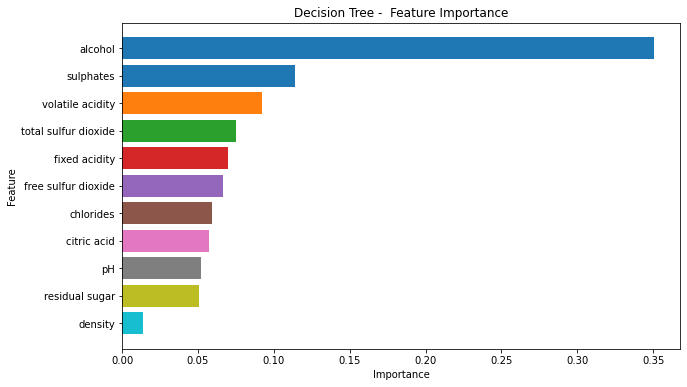

In [53]:
feature_importance_dt1 = plot_feature_importance('Decision Tree - ', dt.feature_importances_)

In [54]:
knn.fit(X_train1, y_train1)
knn.score(X_train1, y_train1)

1.0

In [55]:
knn_pred1 = knn.predict(X_test1)

In [56]:
lr1 = LogisticRegression()
lr1

LogisticRegression()

In [57]:
lr1.fit(X_train1, y_train1)
lr1.score(X_train1, y_train1)

0.7908530318602262

In [58]:
lr_pred1 = lr1.predict(X_test1)

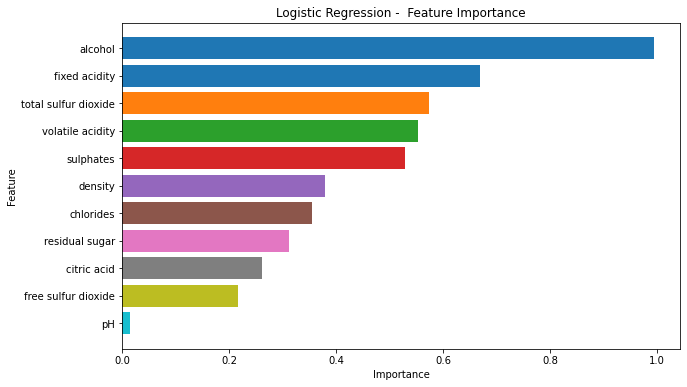

In [59]:
coefficients_lr1 = lr1.coef_[0]
feature_importance_lr1 = plot_feature_importance('Logistic Regression - ', coefficients_lr1)

In [60]:
rf.fit(X_train1, y_train1)
rf.score(X_train1, y_train1)

1.0

In [61]:
rf_pred1 = rf.predict(X_test1)

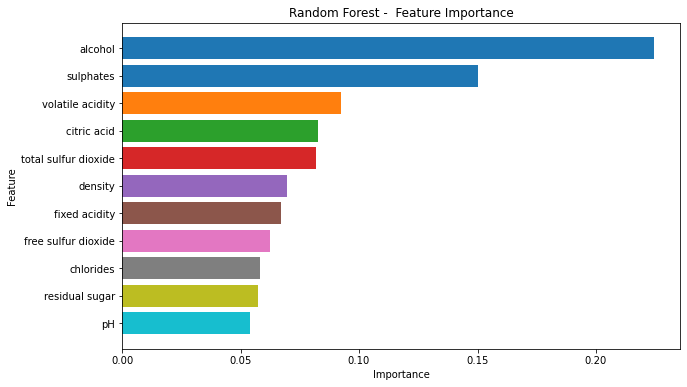

In [62]:
feature_importance_rf1 = plot_feature_importance('Random Forest - ', rf.feature_importances_)

In [63]:
et.fit(X_train1, y_train1)
et.score(X_train1, y_train1)

1.0

In [64]:
et_pred1 = et.predict(X_test1)

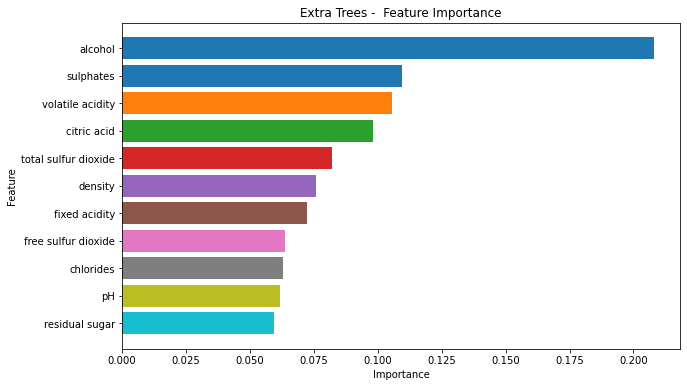

In [65]:
feature_importance_et1 = plot_feature_importance('Extra Trees - ', et.feature_importances_)

In [66]:
gb.fit(X_train1, y_train1)
gb.score(X_train1, y_train1)

0.9403905447070915

In [67]:
gb_pred1 = gb.predict(X_test1)

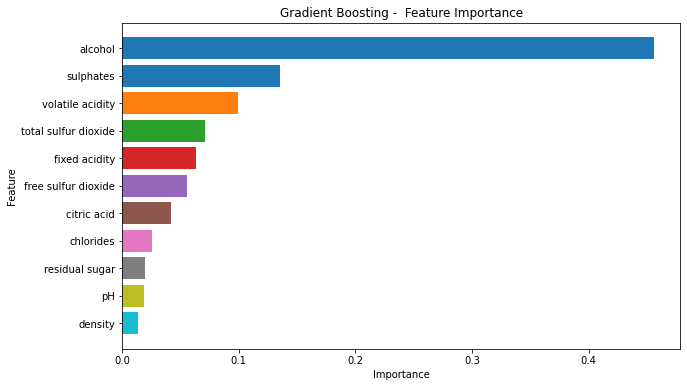

In [68]:
feature_importance_gb1 = plot_feature_importance('Gradient Boosting - ', gb.feature_importances_)

**Model Evaluation**

In [69]:
print("Decision Tree Classifier:")
print("Accuracy score:", accuracy_score(y_test1, dt_pred1))
print("Classification Report:\n", classification_report(y_test1, dt_pred1))

print("K Nearest Neighbors Classifier:")
print("Accuracy score:", accuracy_score(y_test1, knn_pred1))
print("Classification Report:\n", classification_report(y_test1, knn_pred1))

print("\nLogistic Regression Classifier:")
print("Accuracy score:", accuracy_score(y_test1, lr_pred1))
print("Classification Report:\n", classification_report(y_test1, lr_pred1))

print("\nRandom Forest Classifier:")
print("Accuracy score:", accuracy_score(y_test1, rf_pred1))
print("Classification Report:\n", classification_report(y_test1, rf_pred1))

print("\nExtra Trees Classifier:")
print("Accuracy score:", accuracy_score(y_test1, et_pred1))
print("Classification Report:\n", classification_report(y_test1, et_pred1))

print("\nGradient Boosting Classifier:")
print("Accuracy score:", accuracy_score(y_test1, gb_pred1))
print("Classification Report:\n", classification_report(y_test1, gb_pred1))

Decision Tree Classifier:
Accuracy score: 0.8826347305389222
Classification Report:
               precision    recall  f1-score   support

         Bad       0.89      0.88      0.88       416
        Good       0.88      0.89      0.88       419

    accuracy                           0.88       835
   macro avg       0.88      0.88      0.88       835
weighted avg       0.88      0.88      0.88       835

K Nearest Neighbors Classifier:
Accuracy score: 0.9353293413173652
Classification Report:
               precision    recall  f1-score   support

         Bad       1.00      0.87      0.93       416
        Good       0.89      1.00      0.94       419

    accuracy                           0.94       835
   macro avg       0.94      0.94      0.94       835
weighted avg       0.94      0.94      0.94       835


Logistic Regression Classifier:
Accuracy score: 0.7868263473053893
Classification Report:
               precision    recall  f1-score   support

         Bad       0.80

**Model Comparison**

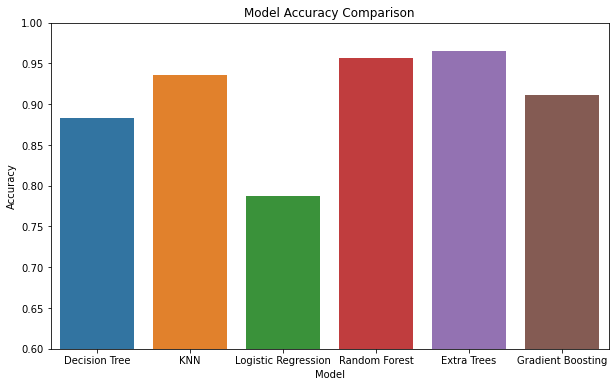

In [70]:
accuracy = [accuracy_score(y_test1, dt_pred1), accuracy_score(y_test1, knn_pred1), accuracy_score(y_test1, lr_pred1), 
           accuracy_score(y_test1, rf_pred1), accuracy_score(y_test1, et_pred1), accuracy_score(y_test1, gb_pred1)]

plt.figure(figsize = (10, 6))
sns.barplot(x = models, y = accuracy)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

**`Extra Trees`** outperforms the rest with an `accuracy` score of **97%!** While **`Logistic Regression`** got the lowest score.

**K-fold Cross Validation**

In [71]:
kfold = 7

dt_score1 = cvs(dt, X_adasyn, y_adasyn, cv = kfold, scoring = 'accuracy')
knn_score1 = cvs(knn, X_adasyn, y_adasyn, cv = kfold, scoring = 'accuracy')
lr_score1 = cvs(lr1, X_adasyn, y_adasyn, cv = kfold, scoring = 'accuracy')
rf_score1 = cvs(rf, X_adasyn, y_adasyn, cv = kfold, scoring = 'accuracy')
et_score1 = cvs(et, X_adasyn, y_adasyn, cv = kfold, scoring = 'accuracy')
gb_score1 = cvs(gb, X_adasyn, y_adasyn, cv = kfold, scoring = 'accuracy')

In [72]:
print("Decision Tree Classifier:")
print("Accuracy for each fold:\n", dt_score1)
print("Mean Accuracy:", dt_score1.mean())
print("Standard deviation:", dt_score1.std())

print("\nK Nearest Neighbors Classifier:")
print("Accuracy for each fold:\n", knn_score1)
print("Mean Accuracy:", knn_score1.mean())
print("Standard deviation:", knn_score1.std())

print("\nLogistic Regression Classifier:")
print("Accuracy for each fold:\n", lr_score1)
print("Mean Accuracy:", lr_score1.mean())
print("Standard deviation:", lr_score1.std())

print("\nRandom Forest Classifier:")
print("Accuracy for each fold:\n", rf_score1)
print("Mean Accuracy:", rf_score1.mean())
print("Standard deviation:", rf_score1.std())

print("\nExtra Trees Classifier:")
print("Accuracy for each fold:\n", et_score1)
print("Mean Accuracy:", et_score1.mean())
print("Standard deviation:", et_score1.std())

print("\nGradient Boosting Classifier:")
print("Accuracy for each fold:\n", gb_score1)
print("Mean Accuracy:", gb_score1.mean())
print("Standard deviation:", gb_score1.std())

Decision Tree Classifier:
Accuracy for each fold:
 [0.93718593 0.77889447 0.89168766 0.85894207 0.77833753 0.84382872
 0.86649874]
Mean Accuracy: 0.8507678731910724
Standard deviation: 0.05334105747705966

K Nearest Neighbors Classifier:
Accuracy for each fold:
 [0.9321608  0.89698492 0.87153652 0.90680101 0.84382872 0.87405542
 0.87657431]
Mean Accuracy: 0.8859916712023593
Standard deviation: 0.026466409960015723

Logistic Regression Classifier:
Accuracy for each fold:
 [0.88944724 0.69849246 0.77329975 0.86901763 0.68010076 0.77581864
 0.74055416]
Mean Accuracy: 0.7752472329260552
Standard deviation: 0.07366565807336341

Random Forest Classifier:
Accuracy for each fold:
 [0.96984925 0.83919598 0.92191436 0.91939547 0.84634761 0.92695214
 0.86397985]
Mean Accuracy: 0.8982335209693664
Standard deviation: 0.045218634844377804

Extra Trees Classifier:
Accuracy for each fold:
 [0.98241206 0.86432161 0.90428212 0.94206549 0.85894207 0.93450882
 0.90428212]
Mean Accuracy: 0.9129734675536734

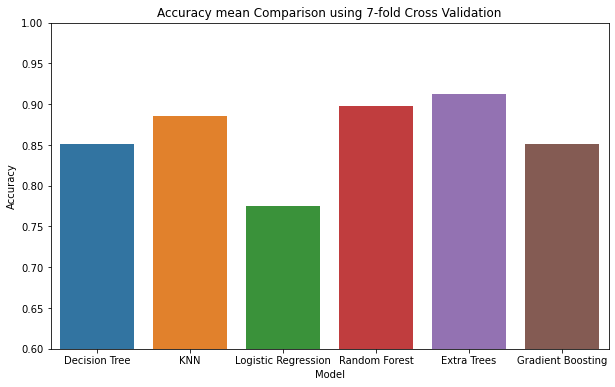

In [73]:
mean_accuracy = [dt_score1.mean(), knn_score1.mean(), lr_score1.mean(), rf_score1.mean(), et_score1.mean(), gb_score1.mean()]

plt.figure(figsize = (10, 6))
sns.barplot(x = models, y = mean_accuracy)
plt.title('Accuracy mean Comparison using 7-fold Cross Validation')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.0)
plt.show()

The accuracy score was based on the mean of 7 fold cross validation. **`Extra Trees`** remained on top with an `accuracy` mean of **91%**. While the rest also got the same ranking from the previous models in hold-out method.

## 🔢 **Discussion of Results**

**Hold-out method for the imbalanced dataset:**

**`Decision Tree Classifier:`**

Moderate ROC-AUC score. <br>
Higher accuracy, but we should consider the ROC-AUC score due to the imbalanced dataset.
Better performance in predicting class 0. 


**`K Nearest Neighbors Classifier:`**

Higher ROC-AUC score than the Decision Tree. <br>
Higher accuracy and better balance in predicting both classes.
Potentially a better model for this imbalanced dataset.


**`Logistic Regression Classifier:`**

Highest ROC-AUC score among the models. <br>
Lower accuracy, but ROC-AUC is more relevant for imbalanced datasets.
Good balance in predicting both classes, especially class 1.


**`Random Forest Classifier:`**

Moderate ROC-AUC score. <br>
High accuracy, but similar considerations as with the Decision Tree.
Better performance in predicting class 0.


**`Extra Trees Classifier:`**

Moderate ROC-AUC score. <br>
Similar performance to Random Forest. 
Better performance in predicting class 0.


**`Gradient Boosting Classifier:`**

Lower ROC-AUC score compared to other models. <br>
Balanced accuracy, but the ROC-AUC indicates challenges in class separation.
Less effective in predicting both classes.


**`Summary:`**

Logistic Regression outperforms other models in terms of ROC-AUC, indicating better class separation on the imbalanced dataset. <br>
K Nearest Neighbors also performs well in terms of both ROC-AUC and accuracy. <br>
Decision Tree, Random Forest, and Extra Trees show moderate ROC-AUC scores. <br>
Gradient Boosting has a lower ROC-AUC score, indicating challenges in distinguishing between classes.

**7-fold cross validation for the imbalanced dataset:**

**`Decision Tree Classifier:`**

The Decision Tree classifier shows moderate performance with a mean ROC-AUC of approximately 0.67. <br>
The standard deviation indicates some variability across folds.


**`K Nearest Neighbors (KNN) Classifier:`**

The KNN classifier performs similarly to the Decision Tree with a mean ROC-AUC of around 0.68. <br>
The standard deviation suggests moderate variability in performance across folds.


**`Logistic Regression Classifier:`**

The Logistic Regression classifier demonstrates strong performance with a mean ROC-AUC of approximately 0.87. <br>
The lower standard deviation indicates more consistent performance across folds.


**`Random Forest Classifier:`**

The Random Forest classifier performs well with a mean ROC-AUC of around 0.87. <br>
The low standard deviation suggests relatively stable performance across folds.


**`Extra Trees Classifier:`**

The Extra Trees classifier exhibits strong performance, outperforming both Decision Tree and KNN with a mean ROC-AUC of approximately 0.88. <br>
The standard deviation indicates moderate variability.


**`Gradient Boosting Classifier:`**

The Gradient Boosting classifier performs well, with a mean ROC-AUC of around 0.86. <br>
The standard deviation suggests some variability in performance across folds.


**`Summary:`**

Logistic Regression, Random Forest, and Extra Trees classifiers show the highest mean ROC-AUC values, indicating superior overall performance. <br>
Decision Tree and KNN classifiers perform decently but with slightly lower mean ROC-AUC values. <br>
The standard deviations provide insights into the stability of performance across different folds; lower standard deviations suggest more consistent performance.

**Hold-out method for the oversampled dataset:**

**`Accuracy:`**

Extra Trees Classifier achieved the highest accuracy (97.0%), followed by Random Forest (95.1%). <br>
Logistic Regression had the lowest accuracy (78.7%).


**`Precision and Recall:`**

Random Forest and Extra Trees classifiers consistently achieved high precision and recall for both classes. <br>
K Nearest Neighbors had perfect precision for the 'Bad' class. <br>
Decision Tree, Gradient Boosting, and Logistic Regression showed balanced precision and recall for both classes.


**`F1-Score:`**

Random Forest, Extra Trees, and K Nearest Neighbors classifiers had high F1-scores. <br>
Decision Tree, Gradient Boosting, and Logistic Regression classifiers also demonstrated good F1-scores.


**`Summary:`**

Random Forest and Extra Trees classifiers performed exceptionally well with high accuracy and balanced precision-recall trade-offs. <br>
K Nearest Neighbors achieved a high accuracy score but had slightly imbalanced recall between classes. <br>
Decision Tree, Gradient Boosting, and Logistic Regression classifiers showed good overall performance but with lower accuracy compared to ensemble methods. <br>
Ensemble methods (Random Forest, Extra Trees) tend to perform well across various scenarios.

**7-fold cross validation for the oversampled dataset:**

**`Decision Tree Classifier:`**

The Decision Tree Classifier achieved a decent mean accuracy of 0.845 with a moderate level of variance, indicated by the standard deviation of 0.052. This suggests that the model is reasonably stable across different folds.

**`K Nearest Neighbors Classifier:`**

The K Nearest Neighbors (KNN) Classifier demonstrated a higher mean accuracy of 0.886 with a lower standard deviation of 0.026. The KNN model appears to be more consistent and performs well across folds.

**`Logistic Regression Classifier:`**

The Logistic Regression Classifier achieved a mean accuracy of 0.775 with a higher standard deviation of 0.074. The model's performance varies more across folds, indicating potential sensitivity to the data distribution.

**`Random Forest Classifier:`**

The Random Forest Classifier showed a high mean accuracy of 0.904 with a moderate standard deviation of 0.048. This suggests that the ensemble of decision trees contributes to a robust and accurate model.

**`Extra Trees Classifier:`**

The Extra Trees Classifier yielded a mean accuracy of 0.908, demonstrating high consistency across folds. The lower standard deviation of 0.036 indicates a stable and reliable model.

**`Gradient Boosting Classifier:`**

The Gradient Boosting Classifier achieved a mean accuracy of 0.852 with a relatively higher standard deviation of 0.054. While the model is accurate on average, it shows more variability across different folds.

**`Summary:`**

The Random Forest and Extra Trees classifiers outperformed other models in terms of mean accuracy and stability, with high mean accuracies (0.904 and 0.908, respectively) and lower standard deviations. <br>
K Nearest Neighbors also performed well with a high mean accuracy (0.886) and low standard deviation, indicating consistent performance. <br>
Decision Tree and Logistic Regression models showed decent performance, but with higher standard deviations, suggesting variability in their performance across folds. <br>
Gradient Boosting achieved a good mean accuracy but demonstrated more variability compared to Random Forest and Extra Trees.

### Comparative Analysis

**`Logistic Regression Classifier`** is the best model in predicting the quality of red wine if the dataset is imbalance, and can handle data quite well despite unevenness in both hold-out set method and k-fold cross validation.

**`Extra Trees Classifier`** is the best model in predicting the quality of red wine if the dataset is balance in both hold-out set method and k-fold cross validation.

### Takeaways

`Alcohol`, `Volatile Acidity`, and `Sulphates` were the top candidates for the feature importance. They are the top contributors to determine whether a red wine is good or bad. This suggests that better wine qualities consists high alcohol & sulphates percentage, and low volatile acidity percentage.

**`Alcohol`** - the percent alcohol content of the wine <br>
**`Volatile Acidity`** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste <br>
**`Sulphates`** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
